In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

In [28]:
from linear_regression import linear_regression

In [29]:
rr_df = pd.read_csv('robosheet1.csv')

In [30]:
rr_df

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


In [31]:
rr_df.describe()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
count,500.000000,500.000000,500.000000,499.000000,500.000000,500.000000
mean,5.086000,0.512000,2.828000,1.078156,2774.388000,616.360000
std,6.949474,0.500357,3.363487,0.514746,3888.407367,178.316044
min,0.000000,0.000000,0.000000,1.000000,532.000000,21.000000
25%,0.000000,0.000000,2.000000,1.000000,1216.250000,640.000000
50%,0.000000,1.000000,2.000000,1.000000,1536.500000,640.000000
75%,13.000000,1.000000,3.000000,1.000000,2530.250000,751.000000
max,17.000000,1.000000,41.000000,6.000000,48388.000000,952.000000


In [32]:
rr_df.AGE.describe()

count    500.000000
mean       5.086000
std        6.949474
min        0.000000
25%        0.000000
50%        0.000000
75%       13.000000
max       17.000000
Name: AGE, dtype: float64

In [33]:
rr_df.drop(rr_df[rr_df.AGE<1].index, inplace = True)


In [34]:
rr_df.AGE.describe()

count    193.000000
mean      13.176166
std        4.285398
min        1.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       17.000000
Name: AGE, dtype: float64

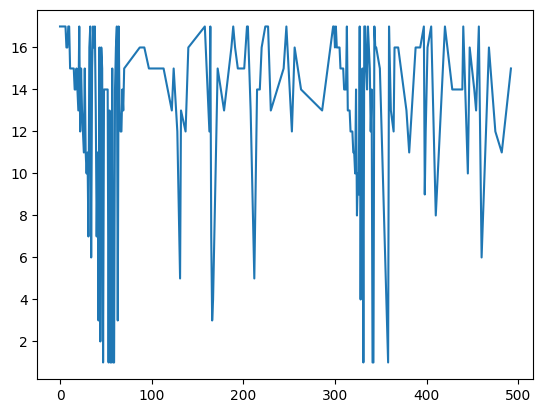

In [35]:
plt.plot(rr_df.AGE);
#just to see aise hi 

In [52]:
# Selecting numerical columns for feature scaling
numerical_columns = ['AGE', 'FEMALE', 'LOS', 'RACE', 'APRDRG']
X = rr_df[numerical_columns].values
y = rr_df['TOTCHG'].values

In [53]:

print("Data types - X:", X.dtype, " y:", y.dtype)

Data types - X: float64  y: int64


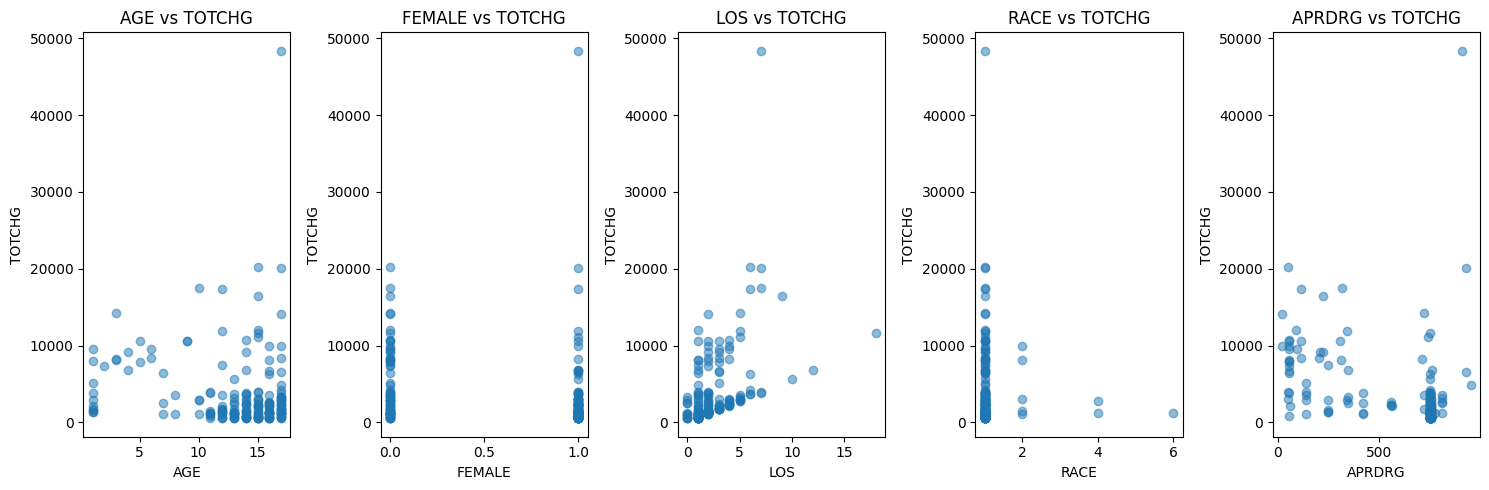

In [51]:
#to see all the graphs

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

for i, column in enumerate(numerical_columns):
    axes[i].scatter(x[:, i], y, alpha=0.5)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('TOTCHG')
    axes[i].set_title(f'{column} vs TOTCHG')

plt.tight_layout()
plt.show()

In [37]:
# Ensure the shape of X and y is appropriate
print(x.shape, y.shape)

(193, 5) (193,)


In [38]:
# # Manual feature scaling (normalize the features)
# def feature_scaling(data):
#     scaled_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
#     return scaled_data

# Feature Scaling
def feature_scaling(data):
    # Scale the data between 0 and 1
    scaled_data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
    return scaled_data

In [39]:
x_scaled = feature_scaling(x)

In [40]:
# Data Splitting
split_idx = int(0.8 * len(x_scaled))
train_data, test_data = x_scaled[:split_idx], x_scaled[split_idx:]
train_target, test_target = y[:split_idx], y[split_idx:]

In [41]:
# Initialize and train the model with the scaled features
#regressor = linear_regression(lr=0.01, k=10000)


# Initialize and train your linear regression model
regressor = linear_regression(lr=0.01, k=10000)


In [42]:
regressor.training_fn(train_data, train_target)


[0. 0. 0. 0. 0.]


In [43]:
regressor.training_fn(train_data, train_target)

[0. 0. 0. 0. 0.]


In [44]:
# Make predictions
predictions = regressor.prediction(test_data)

In [45]:
predictions

array([1131.73739072, 6092.32095852, 7062.26334505, 8800.41942099,
       2136.56413053, 2136.56413053, 4991.62264504, 5732.0837419 ,
       1241.75028098, 2799.17988063, 7555.54222235, 1193.76826651,
       4001.79596668, 1090.54200689, 2723.57574358, 1186.98163588,
       1200.55489714, 2963.96141598, 4725.22637213, 3700.78036081,
       3038.64021078, 1241.75028098, 2498.9889701 , 4835.97988276,
       4660.99865652, 6430.50286686, 1904.36603108, 2006.66694846,
       7632.61749496, 1889.39182751, 2129.7774999 , 5229.22491028,
       3851.06329266, 3487.57922564, 6847.46916528, 2197.14234823,
       2764.77112742, 1787.56651019, 3866.3865915 ])

In [46]:
predictions = regressor.prediction(x_scaled)

In [47]:
predictions

array([ 3487.57922564,  2970.74804661,  5656.57206011,  1207.81712784,
        1234.96365035,  3854.10161493,  4042.99135052,  2129.7774999 ,
        1200.55489714,  2143.82636123,  2143.82636123,  2888.35727893,
        2108.94200795,  3933.45406033,  6775.41491365,  3933.45406033,
        1111.37749884,  3892.2586765 ,  3031.37798009,  2956.24944311,
         676.55753856,  3446.85944187,  5249.22373071,  3405.73425128,
        1804.98894188,  2364.35992035,  6701.58854307,  6119.33925134,
         851.5572768 ,  6835.79830429,  4983.52374282,  4853.76694726,
        1814.80004761,  1255.32354223,  7905.63774998,   765.73493686,
        4049.77798115,  2122.99086927,  1912.53512654,   127.38625098,
        3442.14777656,  1863.51974251,  5425.9991838 ,  3065.78673329,
        7103.45872889,  1193.76826651,  1152.57288267,  7062.26334505,
        2054.17336286,  2047.38673223,  4855.4144324 ,  4855.4144324 ,
       11366.75928237,  4796.07450851,  2799.17988063,  8934.28181184,
      

In [48]:
def mse(test_target,predictions):
    return np.mean((test_target-predictions)**2)

In [49]:
mse = mse (test_target,predictions)
print(mse)

ValueError: operands could not be broadcast together with shapes (39,) (193,) 